In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

In [2]:
df = pd.read_csv('../Dados/train.csv')
pd.set_option('display.max_columns', None)
df

row_id  scout_id  rating_num  winner   team  competitionId  \
0           1        13         7.0  winner  team1              8   
1           3        16         6.5   loser  team2              8   
2           4         4         8.5   loser  team1              5   
3           5        13         8.0   loser  team2              4   
4           7        11         3.5    draw  team1              5   
...       ...       ...         ...     ...    ...            ...   
20448   29221        14         5.0    draw  team2             14   
20449   29223         3         6.0  winner  team2             11   
20450   29224         4         5.0   loser  team1              7   
20451   29226        13         6.0   loser  team1              8   
20452   29227         4         6.0  winner  team2              4   

       player_position_1  player_position_2  player_height  player_weight  \
0                    7.0                7.0       0.317073           0.48   
1                    3.0                9.0       0.463415           0.42   
2                   11.0               11.0       0.682927           0.44   
3                   17.0               17.0       0.682927           0.58   
4                   10.0               10.0       0.731707           0.70   
...                  ...                ...            ...            ...   
20448                NaN                NaN       0.439024           0.26   
20449                4.0                4.0       0.390244           0.32   
20450                5.0                5.0       0.268293           0.30   
20451                5.0                5.0       0.463415           0.46   
20452                4.0                4.0       0.585366           0.36   

       player_general_var_0  player_general_var_1  player_general_var_2  \
0                       0.0                     0                   0.0   
1                       0.0                     0                   0.0   
2                       0.0                     0                   0.0   
3                       0.0                     0                   0.0   
4                       0.0                     0                   0.0   
...                     ...                   ...                   ...   
20448                   0.0                     0                   0.0   
20449                   0.0                     0                   0.0   
20450                   0.0                     0                   0.0   
20451                   0.0                     0                   0.0   
20452                   0.0                     1                   0.0   

       player_general_var_3  player_general_var_4  player_general_var_5  \
0                       0.0              0.114754                  0.00   
1                       0.0              0.081967                  0.00   
2                       0.0              0.065574                  0.25   
3                       0.0              0.000000                  0.00   
4                       0.0              0.262295                  0.25   
...                     ...                   ...                   ...   
20448                   0.0              0.049180                  0.00   
20449                   0.0              0.122951                  0.00   
20450                   0.0              0.155738                  0.00   
20451                   0.0              0.229508                  0.00   
20452                   0.0              0.163934                  0.00   

       player_positional_raw_var_0  player_positional_raw_var_1  \
0                              0.0                          0.0   
1                              0.0                          0.0   
2                              0.0                          0.0   
3                              0.0                          0.0   
4                              0.0                          0.0   
...                            ...               

In [3]:
pd.value_counts(df.dtypes)

float64    794
int64        4
object       2
dtype: int64

In [4]:
df.describe(exclude='number')

,winner,team
count,20453,20453
unique,3,2
top,winner,team1
freq,8735,10306


In [5]:
w = preprocessing.LabelEncoder()
w.fit(df.winner)
df['winner_categorical'] = w.transform(df.winner)
df['winner_categorical'] = pd.Categorical(df.winner_categorical)

t = preprocessing.LabelEncoder()
t.fit(df.team)
df['team_categorical'] = t.transform(df.team)
df['team_categorical'] = pd.Categorical(df.team_categorical)

df

row_id  scout_id  rating_num  winner   team  competitionId  \
0           1        13         7.0  winner  team1              8   
1           3        16         6.5   loser  team2              8   
2           4         4         8.5   loser  team1              5   
3           5        13         8.0   loser  team2              4   
4           7        11         3.5    draw  team1              5   
...       ...       ...         ...     ...    ...            ...   
20448   29221        14         5.0    draw  team2             14   
20449   29223         3         6.0  winner  team2             11   
20450   29224         4         5.0   loser  team1              7   
20451   29226        13         6.0   loser  team1              8   
20452   29227         4         6.0  winner  team2              4   

       player_position_1  player_position_2  player_height  player_weight  \
0                    7.0                7.0       0.317073           0.48   
1                    3.0                9.0       0.463415           0.42   
2                   11.0               11.0       0.682927           0.44   
3                   17.0               17.0       0.682927           0.58   
4                   10.0               10.0       0.731707           0.70   
...                  ...                ...            ...            ...   
20448                NaN                NaN       0.439024           0.26   
20449                4.0                4.0       0.390244           0.32   
20450                5.0                5.0       0.268293           0.30   
20451                5.0                5.0       0.463415           0.46   
20452                4.0                4.0       0.585366           0.36   

       player_general_var_0  player_general_var_1  player_general_var_2  \
0                       0.0                     0                   0.0   
1                       0.0                     0                   0.0   
2                       0.0                     0                   0.0   
3                       0.0                     0                   0.0   
4                       0.0                     0                   0.0   
...                     ...                   ...                   ...   
20448                   0.0                     0                   0.0   
20449                   0.0                     0                   0.0   
20450                   0.0                     0                   0.0   
20451                   0.0                     0                   0.0   
20452                   0.0                     1                   0.0   

       player_general_var_3  player_general_var_4  player_general_var_5  \
0                       0.0              0.114754                  0.00   
1                       0.0              0.081967                  0.00   
2                       0.0              0.065574                  0.25   
3                       0.0              0.000000                  0.00   
4                       0.0              0.262295                  0.25   
...                     ...                   ...                   ...   
20448                   0.0              0.049180                  0.00   
20449                   0.0              0.122951                  0.00   
20450                   0.0              0.155738                  0.00   
20451                   0.0              0.229508                  0.00   
20452                   0.0              0.163934                  0.00   

       player_positional_raw_var_0  player_positional_raw_var_1  \
0                              0.0                          0.0   
1                              0.0                          0.0   
2                              0.0                          0.0   
3                              0.0                          0.0   
4                              0.0                          0.0   
...                            ...               

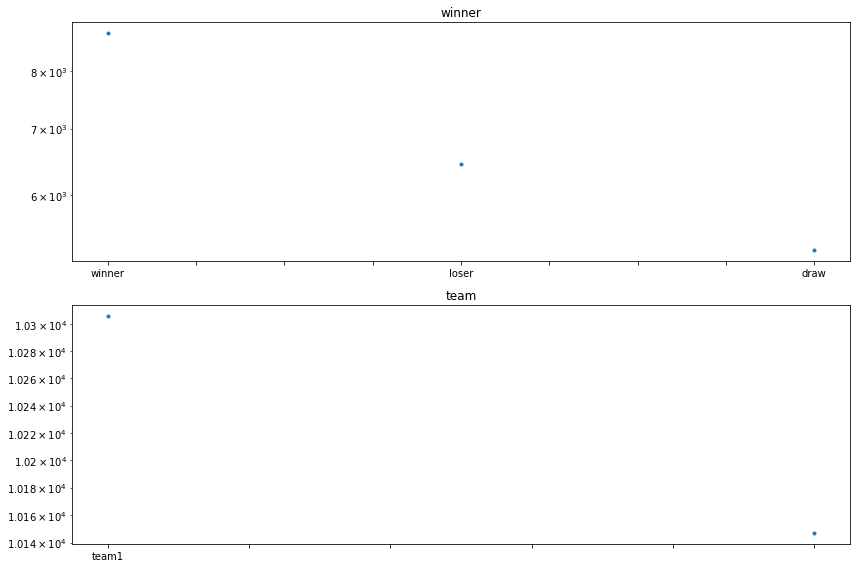

In [6]:
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(12,8))
df_non_numerical = df.select_dtypes(exclude=['number', 'datetime'])
for col, ax in zip(df_non_numerical.columns, axes.ravel()):
  df_non_numerical[col].value_counts().plot(logy=True, title=col, lw=0, marker='.', ax=ax)
plt.tight_layout()

In [7]:
df.drop(['scout_id', 'winner', 'team'], axis=1, inplace=True)
df

row_id  rating_num  competitionId  player_position_1  \
0           1         7.0              8                7.0   
1           3         6.5              8                3.0   
2           4         8.5              5               11.0   
3           5         8.0              4               17.0   
4           7         3.5              5               10.0   
...       ...         ...            ...                ...   
20448   29221         5.0             14                NaN   
20449   29223         6.0             11                4.0   
20450   29224         5.0              7                5.0   
20451   29226         6.0              8                5.0   
20452   29227         6.0              4                4.0   

       player_position_2  player_height  player_weight  player_general_var_0  \
0                    7.0       0.317073           0.48                   0.0   
1                    9.0       0.463415           0.42                   0.0   
2                   11.0       0.682927           0.44                   0.0   
3                   17.0       0.682927           0.58                   0.0   
4                   10.0       0.731707           0.70                   0.0   
...                  ...            ...            ...                   ...   
20448                NaN       0.439024           0.26                   0.0   
20449                4.0       0.390244           0.32                   0.0   
20450                5.0       0.268293           0.30                   0.0   
20451                5.0       0.463415           0.46                   0.0   
20452                4.0       0.585366           0.36                   0.0   

       player_general_var_1  player_general_var_2  player_general_var_3  \
0                         0                   0.0                   0.0   
1                         0                   0.0                   0.0   
2                         0                   0.0                   0.0   
3                         0                   0.0                   0.0   
4                         0                   0.0                   0.0   
...                     ...                   ...                   ...   
20448                     0                   0.0                   0.0   
20449                     0                   0.0                   0.0   
20450                     0                   0.0                   0.0   
20451                     0                   0.0                   0.0   
20452                     1                   0.0                   0.0   

       player_general_var_4  player_general_var_5  \
0                  0.114754                  0.00   
1                  0.081967                  0.00   
2                  0.065574                  0.25   
3                  0.000000                  0.00   
4                  0.262295                  0.25   
...                     ...                   ...   
20448              0.049180                  0.00   
20449              0.122951                  0.00   
20450              0.155738                  0.00   
20451              0.229508                  0.00   
20452              0.163934                  0.00   

       player_positional_raw_var_0  player_positional_raw_var_1  \
0                              0.0                          0.0   
1                              0.0                          0.0   
2                              0.0                          0.0   
3                              0.0                          0.0   
4                              0.0                          0.0   
...                            ...                          ...   
20448                          NaN                          NaN   
20449                          0.0                          0.0   
20450                          0.0                          0.0   
20451                          0.0                          0.0   
20452         

In [8]:
df.dtypes

row_id                               int64
rating_num                         float64
competitionId                        int64
player_position_1                  float64
player_position_2                  float64
                                    ...   
team2_defensive_derived_var_17     float64
team2_offensive_derived_var_18     float64
team2_offensive_derived_var_19     float64
winner_categorical                category
team_categorical                  category
Length: 799, dtype: object

<AxesSubplot:title={'center':'Unique values per feature'}>

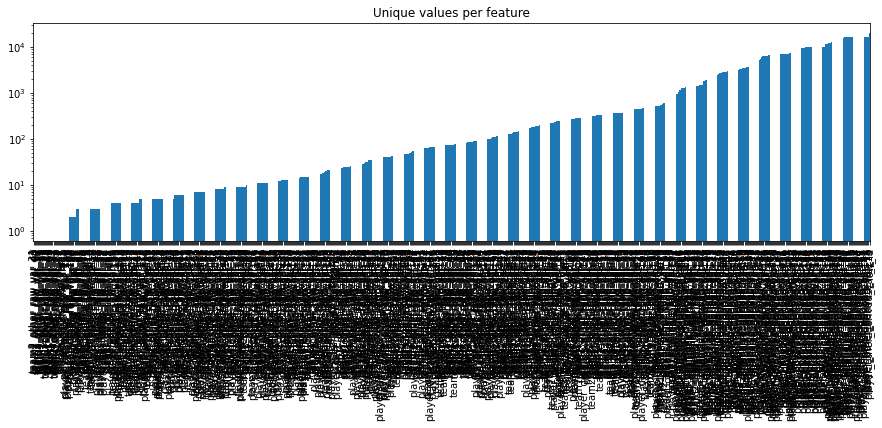

In [9]:
unique_values = df.select_dtypes(include='number').nunique().sort_values()
unique_values.plot.bar(logy=True, figsize=(15,4), title='Unique values per feature')

In [10]:
n_duplicates = df.drop(labels=['row_id'], axis=1).duplicated().sum()
print(f'You seem to gave {n_duplicates} duplicates in yout database.')

You seem to gave 1045 duplicates in yout database.


In [11]:
columns_to_consider = df.drop(labels=['row_id'], axis=1).columns
df = df.drop_duplicates(subset=columns_to_consider)
df.shape

(19408, 799)

Text(0, 0.5, 'Sample Number')

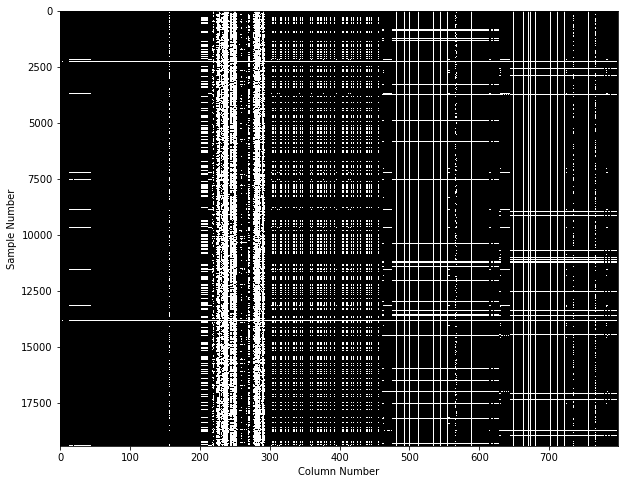

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.imshow(df.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number")

<AxesSubplot:>

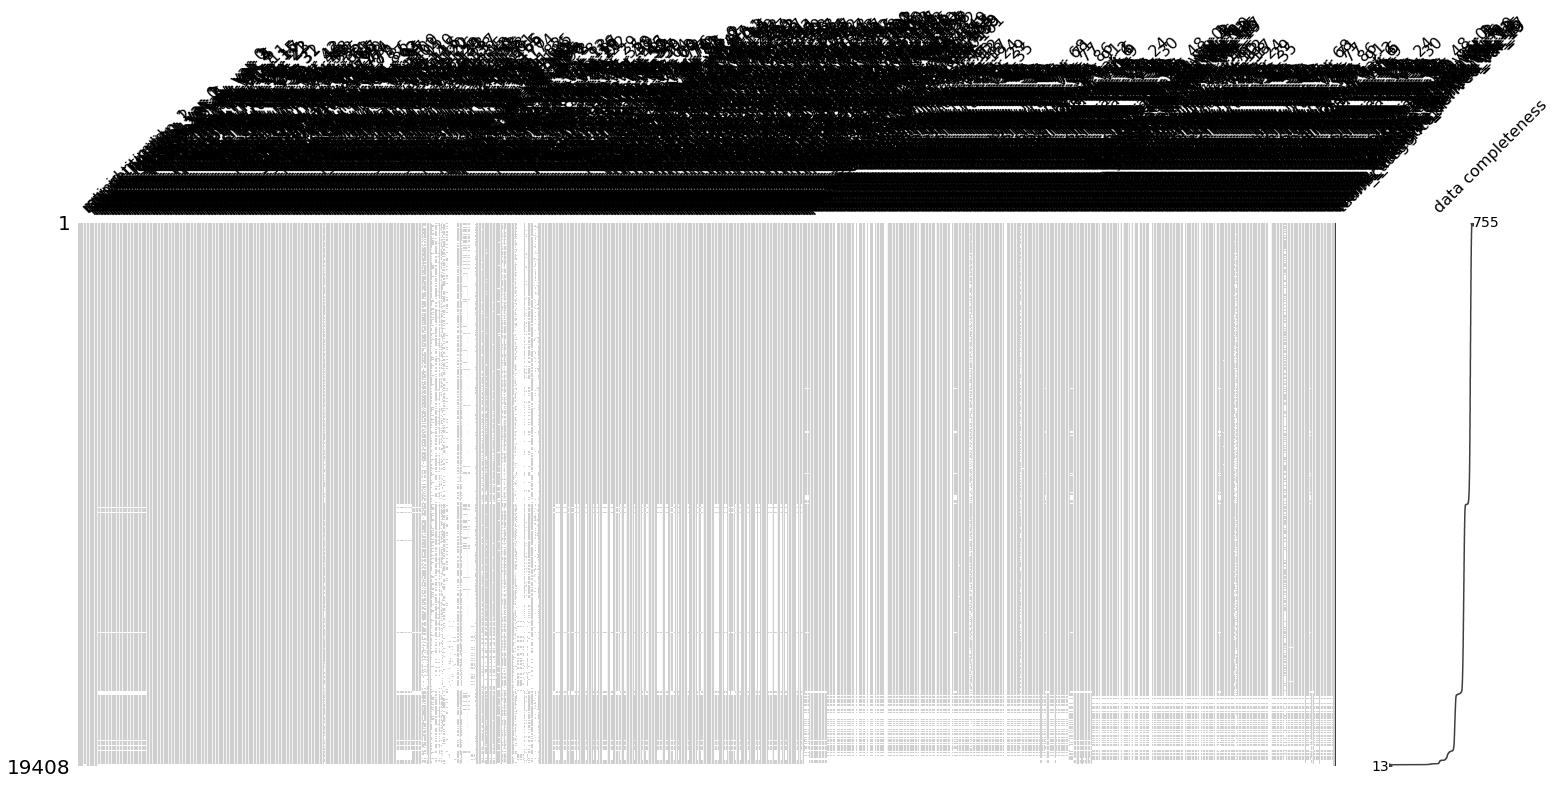

In [13]:
msno.matrix(df, labels=True, sort='descending')

In [14]:
df = df.dropna(thresh=df.shape[1] * 0.80, axis=0).reset_index(drop=True)
df.shape

(16816, 799)

<AxesSubplot:title={'center':'percentage of missing values per feature'}, ylabel='ratio of missing values per feature'>

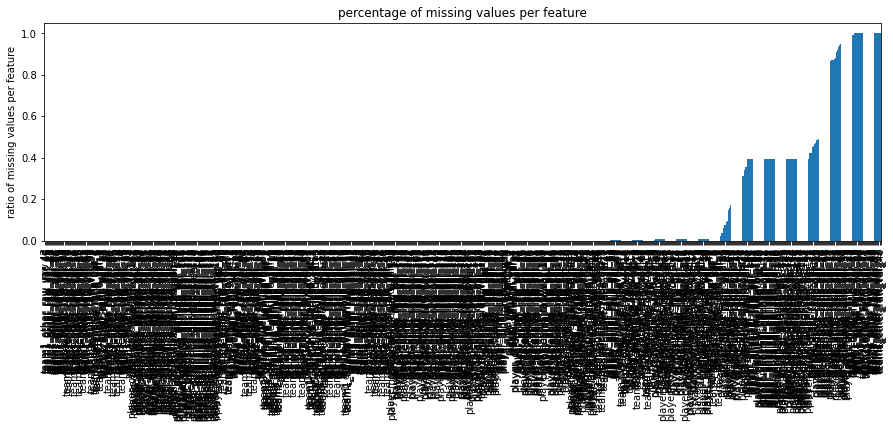

In [15]:
df.isna().mean().sort_values().plot(
  kind='bar', figsize=(15,4),
  title='percentage of missing values per feature',
  ylabel='ratio of missing values per feature')


In [16]:
df = df.dropna(thresh=df.shape[0] * 0.85, axis=1)
df.shape

(16816, 654)

In [17]:
df = df.replace(np.nan, 0)

In [18]:
corr_matrix = df.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(to_drop)


['player_position_2', 'player_offensive_raw_var_87', 'player_other_raw_var_88', 'player_offensive_raw_var_102', 'player_other_raw_var_104', 'player_other_raw_var_118', 'player_other_raw_var_119', 'player_offensive_raw_var_120', 'player_offensive_raw_var_122', 'player_other_raw_var_123', 'player_other_raw_var_124', 'player_offensive_raw_var_131', 'player_other_raw_var_132', 'player_other_raw_var_141', 'player_other_raw_var_146', 'player_other_raw_var_147', 'player_other_raw_var_149', 'player_other_ratio_var_4', 'player_other_ratio_var_43', 'player_offensive_ratio_var_52', 'player_offensive_ratio_var_53', 'player_other_ratio_var_56', 'player_defensive_derived_var_32', 'player_defensive_derived_var_33', 'player_positional_derived_var_43', 'player_positional_derived_var_44', 'player_defensive_derived_var_49', 'player_other_derived_var_51', 'player_offensive_derived_var_52', 'player_positional_derived_var_53', 'player_offensive_derived_var_55', 'player_offensive_derived_var_56', 'player_def

In [19]:
df.drop(to_drop, axis=1, inplace=True)
df.shape

(16816, 496)

In [20]:
df.to_csv('../Resultados/df.csv', index=False)